# Neural Networks from scratch in NumPy
Notebook written and coded by Adam Lang
Date: February 8, 2024

* We will code a neural network from scratch using Python's NumPy library.
* You are probably wondering why would we use this and not a more robust tool such as PyTorch or Tensorflow? Here is why:
1. Good starting point to focus on underlying mathematics and structure of a neural network rather than the tool itself.
2. NumPy works well with matrices/arrays.
3. We will code through forward and backward propagation form scratch.

---



# Steps to build a neural network from scratch in NumPy

1. Load the dataset (input and output)
2. Architecture of the model (#input, hidden layer, output neurons)
3. Randomly initialize the weights for all layers.
4. Implement forward propagation
* Matrix multiplication
* Calculate output
5. Implement backward propagation
- Calculate error
- Calculate rate of change of error with respect to weights of model.
- Update weights
6. Repeat steps for `n` number of epochs.

## 1. Loading Dataset (input and output)

In [1]:
#import required libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#check version of numpy library
print(np.__version__)

1.23.5


In [3]:
#check version of matplotlib library
print(matplotlib.__version__)

3.7.1


In [4]:
# create input array
X = np.array([[1,0,1,0], [1,0,1,1], [0,1,0,1]])
print('\n Input:')
print(X)
# shape of input array
print('\n Shape of Input:', X.shape)


 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Shape of Input: (3, 4)


In [5]:
# converting the input in matrix form
X = X.T
print('\n Input in matrix form:')
print(X)
# shape of input matrix
print('\n Shape of Input Matrix:', X.shape)


 Input in matrix form:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of Input Matrix: (4, 3)


In [6]:
# creating the output array
y = np.array([[1], [1], [0]])
print('\n Actual Output:')
print(y)

#output in matrix form
y = y.T


 Actual Output:
[[1]
 [1]
 [0]]


In [7]:
#shape of actual output
y.shape

(1, 3)

# 2. Architecture of the model (# input, hidden and output neurons)

In [8]:
inputlayer_neurons = X.shape[0] #number of features in data set is 4
hiddenlayer_neurons = 3 #number of hidden layer neurons
output_neurons = 1 #number of neurons at output layer

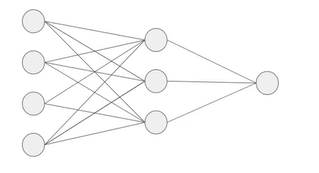

# 3. Initializing the weights for all the layers
NOTE: For simplicity we are assuming that the bias for all layers is 0.

In [9]:
# initializing weights
# shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
# 4 x 3
# np.random generates rand nums between 0 and 1
w_ih = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))

# shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))

In [10]:
# check shape of weight matrix
print(f"Shape of input layer: {w_ih.shape}")
print(f"Shape of hidden layer: {w_ho.shape}")


Shape of input layer: (4, 3)
Shape of hidden layer: (3, 1)


# 4. Implementing forward propagation

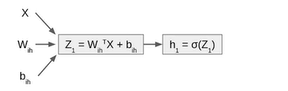

In [11]:
# Define sigmoid activation function
def sigmoid(x):
  return 1/(1 + np.exp(-x)) #sigmoid formula

In [12]:
# hidden layer activations

hidden_layer_input = np.dot(w_ih.T, X)
hiddenlayer_activations = sigmoid(hidden_layer_input)

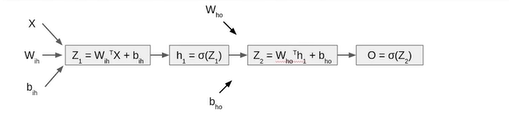

In [13]:
# calculating the output
output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
output = sigmoid(output_layer_input) #sigmoid to get output

In [14]:
# obtain output
output

array([[0.86894863, 0.88180406, 0.83940944]])

# 5. Implementing Backward Propagation



In [17]:
# calculating error
error = np.square(y - output)/2

Rate of change of error w.r.t weight between hidden and output layers

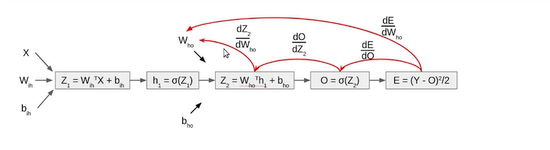

a. Rate of change of error w.r.t output

b. Rate of change of output w.r.t Z2

c. Rate of change of Z2 weights between hidden and output layer

In [18]:
# rate of change of error wrt output
error_wrt_output = -(y-output)

In [19]:
# rate of change of output wrt Z2 -> derivative of sigmoid func
output_wrt_Z2 = np.multiply(output,(1-output))

In [23]:
# rate of change of Z2 wrt weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations

In [24]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_who.shape

((1, 3), (1, 3), (3, 3))

In [25]:
# shape of weights of output layer
w_ho.shape

(3, 1)

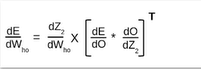

In [26]:
# rate of change of error wrt weight between hidden output layers
error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)

In [27]:
error_wrt_who.shape

(3, 1)

Rate of change of error wrt weight between input and hidden layer

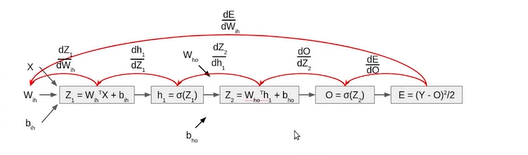

a. Rate of change of error wrt output

b. Rate of change of output wrt Z2

c. Rate of change of Z2 wrt hidden layer activations

d. Rate of change of hidden layer activations wrt Z1

e. Rate of change of Z1 wrt weigths between input and hidden layer

In [35]:
# rate of change of error wrt output
error_wrt_output = -(y-output)

In [36]:
# rate of change of output wrt Z2
output_wrt_Z2 = np.multiply(output,(1-output))

In [40]:
# rate of change of Z2 wrt hidden layer activations
Z2_wrt_h1 = w_ho

In [41]:
# rate of change of hidden layer activations wrt Z1
h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))

In [42]:
# rate of change of Z1 wrt weights between input and hidden layer
Z1_wrt_wih = X

In [43]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_wih.shape

((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

In [44]:
# shape of weights of hidden layer
w_ih.shape

(4, 3)

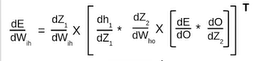

In [45]:
# rate of change of error wrt weights between input and hidden layer
error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2__wrt_h1,(output_wrt_Z2*error_wrt_output))).T)

In [46]:
error_wrt_wih.shape

(4, 3)

update the parameters using gradient descent equation

image.png

In [47]:
# defining the learning rate (alpha)
lr = 0.01

In [48]:
# initial w_ho and w_ih
# w_ho - output random weights
w_ho

array([[0.61633514],
       [0.99600112],
       [0.86942477]])

In [49]:
#w_ih - input random weights
w_ih

array([[0.18376489, 0.99286215, 0.57796261],
       [0.54461094, 0.02666546, 0.64326658],
       [0.01682982, 0.80727697, 0.82602261],
       [0.07098911, 0.14993991, 0.86465244]])

In [50]:
# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who

In [51]:
# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

In [52]:
# updated w_ho and w_ih
w_ho

array([[0.61575252],
       [0.99562144],
       [0.86872977]])

In [53]:
# updated w_ih weights
w_ih

array([[0.1838063 , 0.99289362, 0.57799225],
       [0.54445212, 0.0263859 , 0.64312059],
       [0.01687122, 0.80730844, 0.82605225],
       [0.07084892, 0.14967373, 0.86451555]])

# 6. Training the model for n epochs

In [54]:
# defining the model architecture
# input and output layer neurons
inputlayer_neurons = X.shape[0] #number of features in data set
hiddenlayer_neurons = 3 #num of hidden layer neurons
output_neurons = 1 #num of neurons

# initializing weight
w_ih = np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
w_oh = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))

# defining the parameters
lr = 0.01
epochs = 10000 #10,000 epochs = means we update weights 10,000 times

In [55]:
# initial weights for hidden input connection
w_ih

array([[0.78447141, 0.61593505, 0.79021287],
       [0.25921337, 0.84165828, 0.28359984],
       [0.120205  , 0.69345271, 0.10015185],
       [0.13795919, 0.41794224, 0.39608133]])

In [56]:
# initial weights for hidden output connection
w_ho

array([[0.61575252],
       [0.99562144],
       [0.86872977]])

In [57]:
# storing error after each epoch is run
error_epoch = []
for i in range(epochs):
  # forward propagation

  # hidden layer activation calculations then output
  hidden_layer_input=np.dot(w_ih.T,X)
  hiddenlayer_activations = sigmoid(hidden_layer_input)
  # calculate the output
  output_layer_input=np.dot(w_ho.T, hiddenlayer_activations)
  output = sigmoid(output_layer_input)


  #Backward propagation

  # calculating error
  error = np.square(y-output)/2
  error_wrt_output = -(y-output)
  output_wrt_Z2 = np.multiply(output, (1-output))
  Z2_wrt_who = hiddenlayer_activations
  #rate of change of error wrt weight between hidden and output layer
  error_wrt_who = np.dot(Z2_wrt_who, (error_wrt_output*output_wrt_Z2).T)
  Z2_wrt_h1 = w_ho
  h1_wrt_Z1 = np.multiply(hiddenlayer_activations, (1-hiddenlayer_activations))
  Z1_wrt_wih = X
  # rate of change of error wrt weights
  error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).T)

  #updating the weights between hidden and output layer
  w_ho = w_ho - lr * error_wrt_who
  #updating the weights between input and hidden layer
  w_ih = w_ih - lr * error_wrt_wih

  # appending the error of each epoch
  error_epoch.append(np.average(error))

In [58]:
# updated w_ih (input weight matrices)
w_ih

array([[ 1.47311773,  0.5808745 ,  1.71559449],
       [-1.21439187,  1.06575002, -1.65209671],
       [ 0.80885132,  0.65839216,  1.02553348],
       [-0.90596193,  0.59727918, -0.96399085]])

In [59]:
# updated w_ho (output weight matrices)
w_ho

array([[ 1.56586745],
       [-1.67178765],
       [ 2.36297507]])

Text(0.5, 1.0, 'Plot of Epochs vs. Weights - loss minimized')

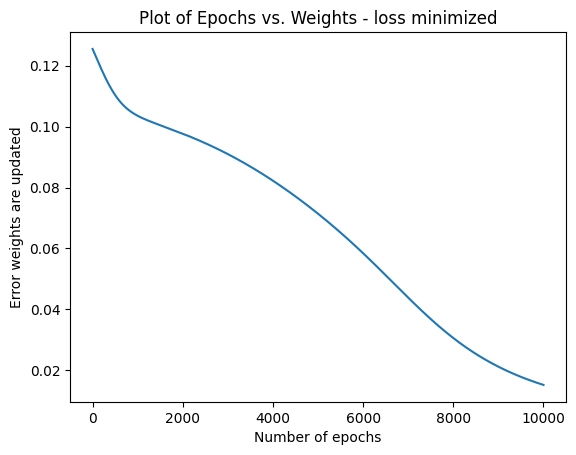

In [66]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))
plt.xlabel('Number of epochs')
plt.ylabel('Error weights are updated')
plt.title('Plot of Epochs vs. Weights - loss minimized')

summary: we can see as we continue to train the model and update the neural network weights with each epoch, that the error/loss is decreasing which is the purpose of training a neural network! Solving an optimization problem.

In [61]:
# final output from the model
output

array([[0.91246189, 0.86165992, 0.25417672]])

In [62]:
# actual target
y

array([[1, 1, 0]])

In [67]:
# error at last epoch
error

array([[0.00383146, 0.00956899, 0.0323029 ]])

Summary: model learned the weights and achieved the lowest possible error to predict the target variable 'y' above

# Appendix


# Perceptron
- Reviewing basic math of a Perceptron.

Suppose we have the values of input, weights and bias like these given below, what would be the output of the perceptron?



Inputs -> X1 = 10000, X2 = 1500, X3 = 500

Weights -> w1 = 5, w2 = 3, w3 = 2

Bias -> -50000

Activation function -> Step function

In [15]:
x1=10000
x2=1500
x3=500

w1=5
w2=3
w3=2

bias=-50000

In [16]:
#calculate step function perceptron
(x1*w1) + (x2*w2) + (x3*w3) + (bias)

5500

Conclusion: Based on "step function" answer is 0 or 1, so a positive result of 5500 would yield a step function result of 1.